In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
from typing import List

In [7]:
def wiener_process(alpha: float, h: float, total_time: float)->np.ndarray:
    N: int = int(total_time//h)
    X_h = np.zeros(N, dtype="float64")
    for n in range(N-1):
        X_h[n+1] = X_h[n] + (alpha*h)**0.5 * random.randrange(-1, 2, 2) # (-1, 1)
    return X_h

def mean(X_2D: np.ndarray, h: float, total_time: float)->np.ndarray:
    N: int = int(total_time//h)
    X_m = np.zeros(N, dtype="float64")
    X_2D = np.transpose(X_2D)

    for t in range(N):
        X_m[t] = np.mean(X_2D[t])
    return X_m

def variance(X_2D: np.ndarray, h: float, total_time: float)->np.ndarray:
    N: int = int(total_time//h)
    X_var = np.zeros(N, dtype="float64")
    X_2D = np.transpose(X_2D)

    for t in range(N):
        X_var[t] = np.var(X_2D[t])
    return X_var

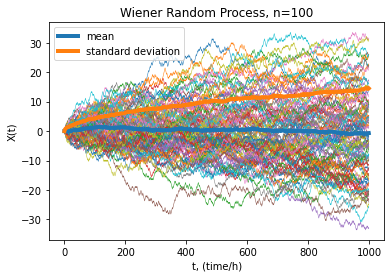

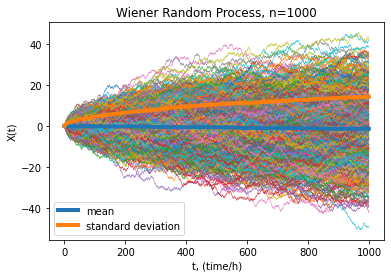

In [9]:
def run_simulation(alpha: int, h: int, total_time: int, sample: int)->None:
    X_samples = np.empty((0, int(total_time//h)), dtype="float64") # N = floor(time/h)
    for _ in range(sample):
        X: np.ndarray = wiener_process(alpha=alpha, h=h, total_time=total_time) #1D ndarray
        X_samples = np.append(X_samples, [X], axis=0) #2D ndarray

    sample_mean = mean(X_2D=X_samples, h=h, total_time=total_time)
    sample_var = variance(X_2D=X_samples, h=h, total_time=total_time)

    for s in range(sample):
        plt.plot(X_samples[s], linewidth="0.5")
    plt.plot(sample_mean, linewidth="4.0", label="mean")
    plt.plot(np.sqrt(sample_var), linewidth="4.0", label="standard deviation")
    plt.title("Wiener Random Process, n={}".format(sample))
    plt.xlabel("t, (time/h)")
    plt.ylabel("X(t)")
    plt.legend()
    plt.show()

run_simulation(alpha=2, h=0.1, total_time=100, sample=100)
run_simulation(alpha=2, h=0.1, total_time=100, sample=1000)